# Data Visualization with Matplotlib and Seaborn

In [ ]:
TODO
Change bears 
Add savefig

Agenda: 
- Explain what types of graphs best convey specific relationships
- Use the subplots syntax to create a graph
    - Line
    - Bar/hbar
    - Scatter
    - Hist
- Look in the documentation to understand new graphing methods
- Customize different aspects of a graph
    - labels (title, axis)
    - Linestyle 
    - Colors
- Create multiple graphs in one figure
- Use seaborn to quickly create statistical graphs

Take 2 minutes to peruse some plot examples here:
[Python Graphing Gallery](https://python-graph-gallery.com) or [Data Viz Project](https://datavizproject.com/)

Then, write down what types of plots may be appropriate to visualize the scenarios below.

### Scenario 1: You would like to display counts of coffee shops in each Chicago zipcode?

In [50]:
 # what are some appropriate plots?

### Scenario 2: You would like to visualize the correllation between miles per gallon of a car and horsepower

In [ ]:
# what are some appropriate plots?

### Scenario 3: You would like to visualize the distribution of blood pressure readings of American males between 25 and 35

In [ ]:
# what are some appropriate plots?

## Why Visualize Data?
or why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. 

In [2]:
# One of several libraries you will get real used to importing.  M
# https://matplotlib.org/3.1.1/index.html
import matplotlib.pyplot as plt

# Two well worn data sets
from sklearn.datasets import load_iris, load_wine
import pandas as pd

data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](iris_virginica.jpg)

### Dataframe vs Graph: Which do you prefer?

In [3]:
# I like to use sample rather than head because it gives me a better idea of the distribution of observations
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
117,7.7,3.8,6.7,2.2,2
46,5.1,3.8,1.6,0.2,0
145,6.7,3.0,5.2,2.3,2
2,4.7,3.2,1.3,0.2,0
62,6.0,2.2,4.0,1.0,1


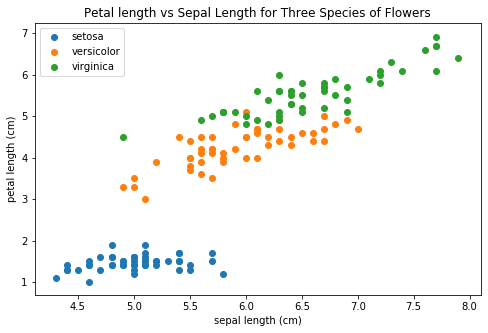

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for flower in df['target'].unique():
    subset_df = df[df['target'] == flower]
    x = subset_df['sepal length (cm)']
    y = subset_df['petal length (cm)']
    
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?

In [5]:
# your thoughts here

In [6]:
#__SOLUTION__
'''
some ideas:
   - The data is separated into three categories.
   - It looks like there are clear lines that there are several clear lines that can be drawn to separate the groups along petal length.
   - Separation of Versicolor and Virginica is more difficult than that between setosa and and the other two.
   - There is a slight upward correlation between Petal lengthe and sepal length in the versicolor and virginica groups.
   - There appears to be a fairly balanced number of samples across the groups.
   - There appears to be one potential outlier.
'''

'\nsome ideas:\n   - The data is separated into three categories.\n   - It looks like there are clear lines that there are several clear lines that can be drawn to separate the groups along petal length.\n   - Separation of Versicolor and Virginica is more difficult than that between setosa and and the other two.\n   - There is a slight upward correlation between Petal lengthe and sepal length in the versicolor and virginica groups.\n   - There appears to be a fairly balanced number of samples across the groups.\n   - There appears to be one potential outlier.\n'

In your presentation decks, you will no doubt be tempted to print out the head of a data frame, take a screen shot, and plop it in the middle of a slide.  We all have that instinct; the dataframe object will become one your most cherished objects. If you put them in your deck, you will no doubt hear one of us gently request its replacement with some other figure.

## The Effectiveness of Visualizations

- People are highly visual and can synthesize visual information such more quickly than rows and columns of numbers 
- Precognitive understanding of the data
- Visual representations can be much more viscerally persuasive 

## What Makes an Effective Visualization?

- Each graph should have a clear point it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your audience! Come up with a use case and audience to pitch your visualizations

- Choosing the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
        - Red and Down tends to be negative while Green and Up is positive
        - Lighter hues are seen as lower values and darker is higher values
        - Axis start at zero
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
        - Changing the axis scale
        - Using two different y axis scales to compare trends
        - Showing cumulative data which will always be increasing to hide a downturn in a trend
        - Pie charts (comparing degrees is not something people are good at) just use a bar chart
        - Inconsistent units
        - Not showing all of the data for motivated reasons
        - Percentages not adding up to 100

<img src="data/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

_____



<img src="data/usa-today-2.png">

## How to Matplotlib

<img src="data/matplotlib_anatomy.png">

Explanation of non-obvious terms

__Figure__ - This is the sheet of paper all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

## Plotting Syntax

- There are many different ways to create plots but we will strongly suggest using the subplots method
    - This is useful for extensibility 
    - Gives you access to the figure and individual axis in a plot
    - More fine grained control of customizing your plot
    - Easily create additional axis on your figure
    - This syntax is a good level of abstraction
        - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
    - Flatiron Specifc
        - Plotting code will be more easily readable for other students and instructors
        - You don’t need to remember many different ways to organize your code

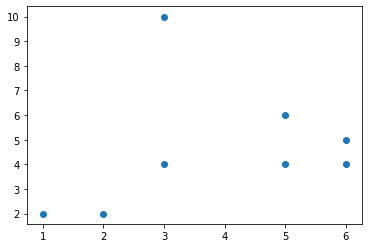

In [7]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Create data
x = [1, 2, 3, 3, 5, 5, 6, 6]
y = [2, 2, 10, 4, 6, 4, 5, 4]

# Create a scatter plot on our axis object
ax.scatter(x, y);

Let's add another subplot that is to the right of the current plot:

Text(0, 0.5, 'Income in 1000s')

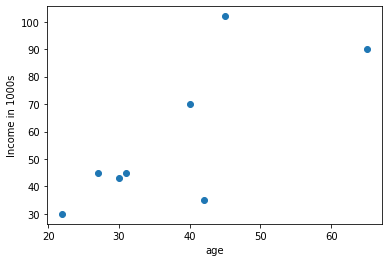

In [15]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Create data
ages = [30, 45, 27, 40, 65, 22, 42,31]
incomes = [43,102 ,45, 70, 90, 30, 35, 45]

# Create a scatter plot on our axis object
ax.scatter(ages, incomes)
ax.set_xlabel("age")
ax.set_ylabel("Income in 1000s")

In [16]:
# Your turn: adjust the bar plot above so the barplot is below the scatter.

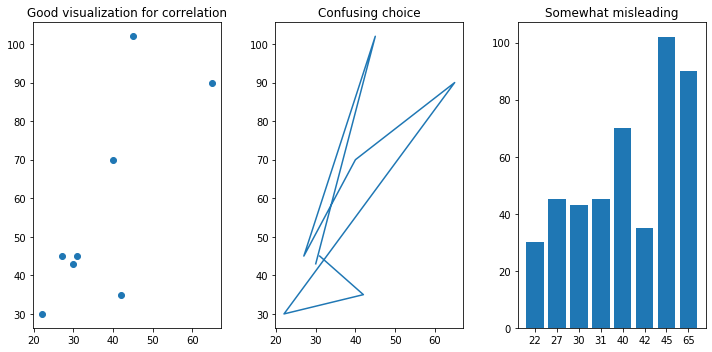

In [20]:
# Create figure and axis objects
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,5))
# Create data
ages = [30, 45, 27, 40, 65, 22, 42,31]
incomes = [43,102 ,45, 70, 90, 30, 35, 45]

age_income = sorted([(age,income) for age,income in zip(ages,incomes)])
age_sorted = [person[0] for person in age_income]
income_sorted = [person[1] for person in age_income]
# Create a scatter plot on our axis object
ax1.scatter(ages, incomes);
ax1.set_title('Good visualization for correlation')
ax2.plot(ages, incomes);
ax2.set_title("Confusing choice")

ax3.bar(x=range(0,8), height= income_sorted)
ax3.set_xticks(range(0,8))
ax3.set_xticklabels(age_sorted)
ax3.set_title('Somewhat misleading')
plt.tight_layout();

Let's work with a single plot. 

Let's imagine these are counts of our target variable categories in a classification problem



<BarContainer object of 4 artists>

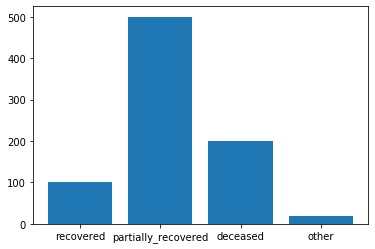

In [22]:
outcomes = [100,500,200,20]
outcome_labels = ['recovered', 'partially_recovered', 'deceased', 'other']

fig, ax = plt.subplots()

ax.bar(outcome_labels, outcomes)

<BarContainer object of 4 artists>

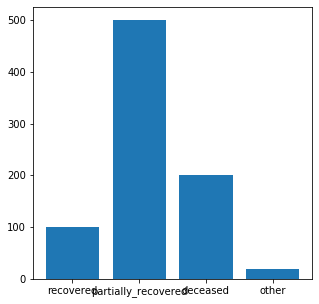

In [23]:
# Let's make the figure a little bit taller

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
ax.bar(outcome_labels, outcomes)

Uh, oh, that messed up our x-ticks
We can use t

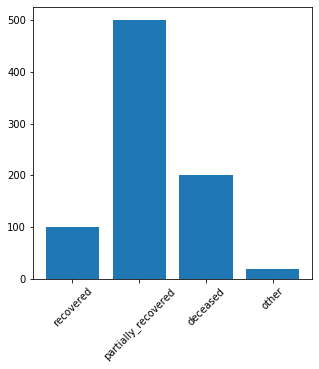

In [24]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
ax.bar(outcome_labels, outcomes)
ax.tick_params(axis='x', rotation=45)

Let's add labels to our graph.
We are working with an axis object.  
We are going to get very familiar perusing documentation and stack overflow.
Either do some Google sleuthing, or follow this link and figure out how to set the xlabel, the ylabel, and the title.
https://matplotlib.org/api/axes_api.html#axis-labels-title-and-legend

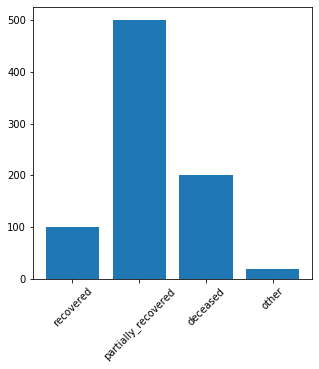

In [25]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
ax.bar(outcome_labels, outcomes)
ax.tick_params(axis='x', rotation=45)


Text(0.5, 1.0, 'Health Outcome Counts Across All Classes')

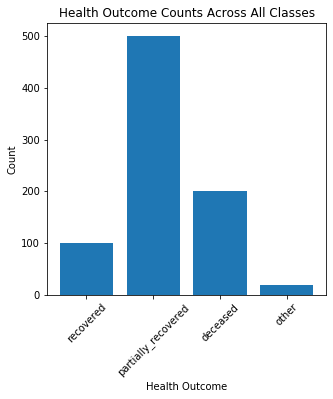

In [37]:
#__SOLUTION__
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
ax.bar(outcome_labels, outcomes)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Health Outcome')
ax.set_ylabel('Count')
ax.set_title('Health Outcome Counts Across All Classes')

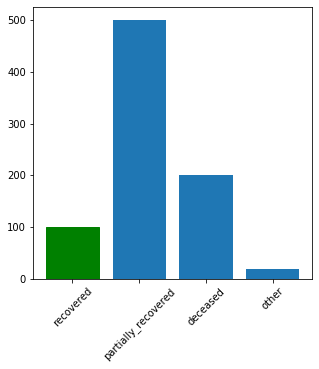

In [46]:
# Let's say we want to put emphasis on the people who recovered by changing the color of a bar.
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)
bars = ax.bar(outcome_labels, outcomes)
ax.tick_params(axis='x', rotation=45)
bars[0].set_color('green')

## Customizing Your Graph

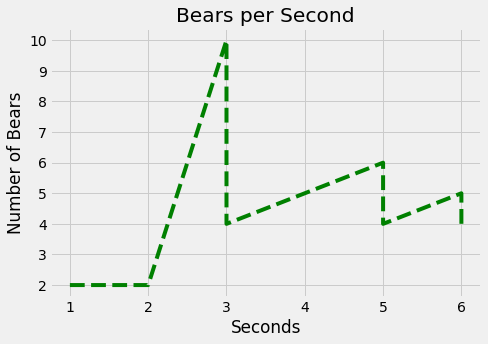

In [61]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(7, 5))

# Create data
x = [1, 2, 3, 3, 5, 5, 6, 6]
y = [2, 2, 10, 4, 6, 4, 5, 4]

# Create a line graph with a different color and linestyle
ax.plot(x, y, color='green', linestyle='--')

# Add in axis labels
ax.set_xlabel('Seconds')
ax.set_ylabel('Number of Bears')
ax.set_title('Bears per Second')

fig.tight_layout()
fig.savefig('bears');

### Look at the documentation to see all of the possible colors, linestyles and more

[Matplotlib named colors](https://matplotlib.org/2.0.2/examples/color/named_colors.html)

[Line styles](https://matplotlib.org/2.0.2/examples/color/named_colors.html)

### Set a new style for all graphs

Find another style from the Docs and set the style. Once you've set the style try rerunning older graphs:

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

In [67]:
style = 'fivethirtyeight'
plt.style.use(style)

### Multiple plots on one graph

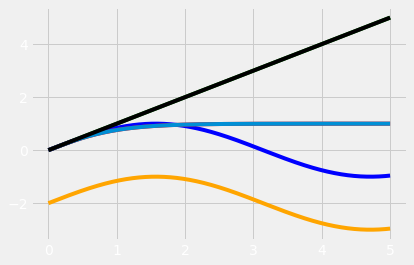

In [78]:
fig, ax = plt.subplots()

x = np.linspace(0, 5, num=1000)
y_1 = np.sin(x) - 2
y_2 = np.tanh(x)

funcs = [np.abs, np.sin, np.tanh]
colors = ['green', 'blue', 'red']

for func, color in zip(funcs, colors):
    ax.plot(x, func(x), color=color)
    
    
# plot sine
ax.plot(x, y_1, color='orange')

# To plot the tanh just use the axis object and plot again
ax.plot(x, y_2)

ax.plot(x, np.abs(x), color='black');

### Histograms

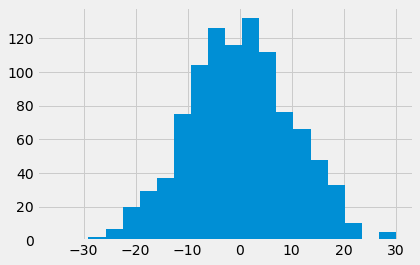

In [55]:
fig, ax = plt.subplots()

# Pull 1000 values from a normal distribution with a mean of 0 and std of 10
x = np.random.normal(0, 10, size=1000)

ax.hist(x, bins=(20));

# Challenge: Add a vertical line indicating the mean of the values

### Bar charts

## Your Turn

Grab a partner and create 2 different kinds of graphs with the given dataset.

In [56]:
wine_data = load_wine()

## Seaborn

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [12]:
import seaborn as sns

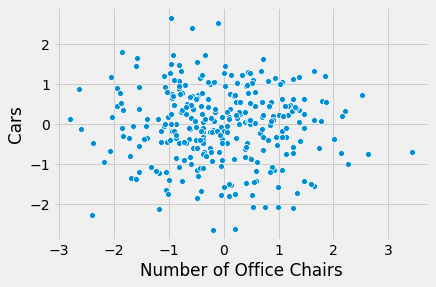

In [13]:
fig, ax = plt.subplots()

x, y = np.random.randn(2, 300)

# With Seaborn we can still use the subplots syntax by passing our axis object into the graphing function
sns.scatterplot(x, y, ax=ax)
ax.set_ylabel('Cars')
ax.set_xlabel('Number of Office Chairs');

### Violin Plots

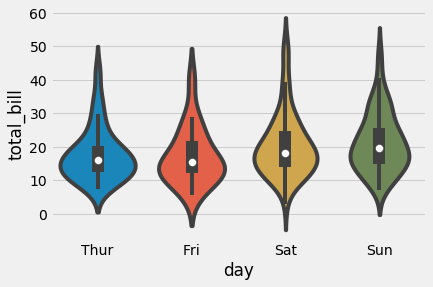

In [14]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

sns.violinplot(x="day", y="total_bill", data=tips);

Use another seaborn ploting method to explore the dataset